In [1]:
import os
import gc
import numpy as np
import pandas as pd
import librosa.display
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.utils import np_utils, plot_model
from keras.models import Sequential
from keras.layers import *
from keras import optimizers

In [2]:
# -*- coding: utf-8 -*-  
def listdir(path: str, list_name: list):
    for file in os.listdir(path):
        file_path = os.path.join(path, file)
        if os.path.isdir(file_path):
            listdir(file_path, list_name)
        elif os.path.splitext(file_path)[1] == '.wav':
            list_name.append(file_path)
    return list_name

In [3]:
list_name = list()
list_name = listdir('RawData/CASIA database', list_name)

In [4]:
len(list_name)

1200

In [5]:
list_name

['RawData/CASIA database\\liuchanhg\\angry\\201.wav',
 'RawData/CASIA database\\liuchanhg\\angry\\202.wav',
 'RawData/CASIA database\\liuchanhg\\angry\\203.wav',
 'RawData/CASIA database\\liuchanhg\\angry\\204.wav',
 'RawData/CASIA database\\liuchanhg\\angry\\205.wav',
 'RawData/CASIA database\\liuchanhg\\angry\\206.wav',
 'RawData/CASIA database\\liuchanhg\\angry\\207.wav',
 'RawData/CASIA database\\liuchanhg\\angry\\208.wav',
 'RawData/CASIA database\\liuchanhg\\angry\\209.wav',
 'RawData/CASIA database\\liuchanhg\\angry\\210.wav',
 'RawData/CASIA database\\liuchanhg\\angry\\211.wav',
 'RawData/CASIA database\\liuchanhg\\angry\\212.wav',
 'RawData/CASIA database\\liuchanhg\\angry\\213.wav',
 'RawData/CASIA database\\liuchanhg\\angry\\214.wav',
 'RawData/CASIA database\\liuchanhg\\angry\\215.wav',
 'RawData/CASIA database\\liuchanhg\\angry\\216.wav',
 'RawData/CASIA database\\liuchanhg\\angry\\217.wav',
 'RawData/CASIA database\\liuchanhg\\angry\\218.wav',
 'RawData/CASIA database\\li

In [6]:
label_list = list()
for i in range(len(list_name)):
    #     print(list_name)
    name = list_name[i]
    if "liuchanhg" in name:
        label_list.append("liuchanhg")
    if "wangzhe" in name:
        label_list.append("wangzhe")
    if "zhaoquanyin" in name:
        label_list.append("zhaoquanyin")
    if "ZhaoZuoxiang" in name:
        label_list.append("ZhaoZuoxiang")

In [7]:
len(label_list)

1200

In [8]:
label_list

['liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuc

In [9]:
labels = pd.DataFrame(label_list)

In [10]:
df = pd.DataFrame(columns=['feature'])
bookmark = 0
for index, y in enumerate(list_name):
    X, sample_rate = librosa.load(y, res_type='kaiser_fast', duration=2.5, sr=22050 * 2, offset=0.5)
    sample_rate = np.array(sample_rate)
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
    feature = mfccs
    df.loc[bookmark] = [feature]
    bookmark = bookmark + 1

In [11]:
df3 = pd.DataFrame(df['feature'].values.tolist())

In [12]:
newdf = pd.concat([df3, labels], axis=1)

In [13]:
rnewdf = shuffle(newdf)
rnewdf = rnewdf.fillna(0)
rnewdf

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,0
448,-14.576772,-11.877527,-12.049251,-11.796226,-15.118876,-25.666721,-28.548399,-30.129753,-24.290562,-10.858087,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,wangzhe
79,-9.698610,-13.265867,-21.676388,-23.156633,-24.538746,-25.496901,-25.972197,-26.499050,-26.863060,-21.760601,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,liuchanhg
821,-20.138021,-21.617022,-29.177616,-30.742123,-31.051716,-27.159313,-21.650513,-17.427944,-16.569679,-17.389360,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,zhaoquanyin
1049,-24.663908,-28.095804,-34.067043,-34.229393,-35.035675,-35.849007,-36.329491,-35.030773,-33.010834,-32.408173,...,-27.994505,-29.513935,-32.125484,-32.442848,-33.443214,-35.283596,-33.127071,-31.802711,-26.405661,ZhaoZuoxiang
1155,-20.282127,-21.505825,-24.496193,-23.503384,-24.111614,-22.365963,-19.100857,-17.606035,-11.220945,-8.740395,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,ZhaoZuoxiang
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,-11.633261,-14.416419,-21.628361,-21.820078,-22.756273,-22.329660,-23.644838,-23.092581,-20.961025,-20.963137,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,zhaoquanyin
237,-8.812943,-11.657113,-15.677277,-15.407175,-18.321323,-20.652479,-19.225899,-17.456219,-16.913536,-17.134075,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,liuchanhg
878,-13.988189,-18.060854,-28.847809,-28.161552,-27.880503,-28.749342,-28.693369,-28.884462,-23.451948,-21.359646,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,zhaoquanyin
1072,-5.281694,-5.104154,-8.021806,-7.998987,-8.016101,-7.178820,-6.621597,-6.450766,-6.152554,-6.357877,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,ZhaoZuoxiang


In [14]:
features = rnewdf.iloc[:, :-1]
labels = rnewdf.iloc[:, -1:]

In [15]:
features

,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
448,-14.576772,-11.877527,-12.049251,-11.796226,-15.118876,-25.666721,-28.548399,-30.129753,-24.290562,-10.858087,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
79,-9.698610,-13.265867,-21.676388,-23.156633,-24.538746,-25.496901,-25.972197,-26.499050,-26.863060,-21.760601,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
821,-20.138021,-21.617022,-29.177616,-30.742123,-31.051716,-27.159313,-21.650513,-17.427944,-16.569679,-17.389360,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1049,-24.663908,-28.095804,-34.067043,-34.229393,-35.035675,-35.849007,-36.329491,-35.030773,-33.010834,-32.408173,...,-24.561466,-27.994505,-29.513935,-32.125484,-32.442848,-33.443214,-35.283596,-33.127071,-31.802711,-26.405661
1155,-20.282127,-21.505825,-24.496193,-23.503384,-24.111614,-22.365963,-19.100857,-17.606035,-11.220945,-8.740395,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,-11.633261,-14.416419,-21.628361,-21.820078,-22.756273,-22.329660,-23.644838,-23.092581,-20.961025,-20.963137,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
237,-8.812943,-11.657113,-15.677277,-15.407175,-18.321323,-20.652479,-19.225899,-17.456219,-16.913536,-17.134075,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
878,-13.988189,-18.060854,-28.847809,-28.161552,-27.880503,-28.749342,-28.693369,-28.884462,-23.451948,-21.359646,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1072,-5.281694,-5.104154,-8.021806,-7.998987,-8.016101,-7.178820,-6.621597,-6.450766,-6.152554,-6.357877,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [16]:
labels

,0
448,wangzhe
79,liuchanhg
821,zhaoquanyin
1049,ZhaoZuoxiang
1155,ZhaoZuoxiang
...,...
831,zhaoquanyin
237,liuchanhg
878,zhaoquanyin
1072,ZhaoZuoxiang


In [17]:
X_train_val, X_test, y_train_val, y_test = train_test_split(features, labels, test_size=0.2, shuffle=True, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, shuffle=True, random_state=1)

In [18]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(720, 216)
(240, 216)
(240, 216)
(720, 1)
(240, 1)
(240, 1)


In [19]:
lb = LabelEncoder()

X_train = np.expand_dims(X_train, axis=2)
X_val = np.expand_dims(X_val, axis=2)
X_test = np.expand_dims(X_test, axis=2)
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_val = np_utils.to_categorical(lb.fit_transform(y_val))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

D:\Applications\Python\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
model = Sequential()

model.add(Conv1D(256, 5, padding='same', input_shape=(216, 1)))
model.add(Activation('relu'))
model.add(Conv1D(128, 5, padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=8))
model.add(Conv1D(128, 5, padding='same', ))
model.add(Activation('relu'))
model.add(Conv1D(128, 5, padding='same', ))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(4))
model.add(Activation('softmax'))
opt = optimizers.Adam(learning_rate=0.00001, decay=1e-6)

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 216, 256)          1536      
                                                                 
 activation (Activation)     (None, 216, 256)          0         
                                                                 
 conv1d_1 (Conv1D)           (None, 216, 128)          163968    
                                                                 
 activation_1 (Activation)   (None, 216, 128)          0         
                                                                 
 dropout (Dropout)           (None, 216, 128)          0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 27, 128)          0         
 )                                                               
                                                        

In [22]:
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [23]:
plot_model(model, to_file="images/model.png", show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [24]:
cnnhistory = model.fit(X_train, y_train, batch_size=128, epochs=500, validation_data=(X_val, y_val))

Epoch 1/500
6/6 [==============================] - 2s 271ms/step - loss: 1.8933 - accuracy: 0.1514 - val_loss: 1.7264 - val_accuracy: 0.1417
Epoch 2/500
6/6 [==============================] - 1s 234ms/step - loss: 1.7538 - accuracy: 0.1389 - val_loss: 1.6221 - val_accuracy: 0.1333
Epoch 3/500
6/6 [==============================] - 1s 236ms/step - loss: 1.6458 - accuracy: 0.1361 - val_loss: 1.5418 - val_accuracy: 0.1375
Epoch 4/500
6/6 [==============================] - 1s 236ms/step - loss: 1.5625 - accuracy: 0.1361 - val_loss: 1.4801 - val_accuracy: 0.1458
Epoch 5/500
6/6 [==============================] - 1s 243ms/step - loss: 1.4959 - accuracy: 0.1528 - val_loss: 1.4320 - val_accuracy: 0.1667
Epoch 6/500
6/6 [==============================] - 2s 282ms/step - loss: 1.4413 - accuracy: 0.1764 - val_loss: 1.3917 - val_accuracy: 0.2042
Epoch 7/500
6/6 [==============================] - 2s 277ms/step - loss: 1.3994 - accuracy: 0.2139 - val_loss: 1.3572 - val_accuracy: 0.2417
Epoch 8/500
6

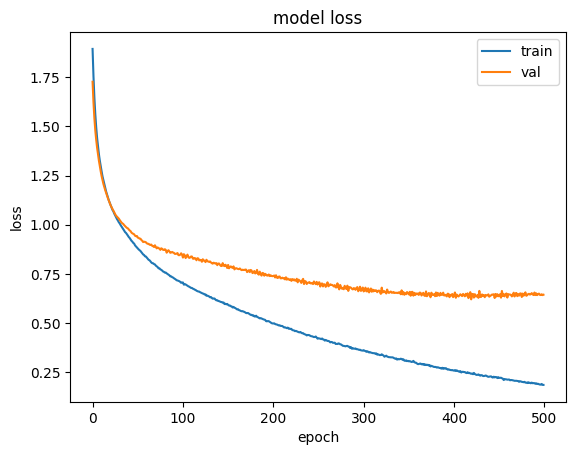

<Figure size 640x480 with 0 Axes>

In [25]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()
plt.savefig("images/loss.png")

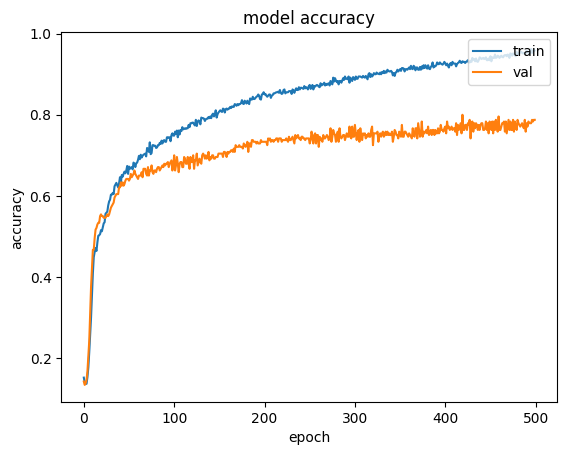

<Figure size 640x480 with 0 Axes>

In [26]:
plt.plot(cnnhistory.history['accuracy'])
plt.plot(cnnhistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()
plt.savefig("images/accuracy.png")

In [27]:
model_name = 'model.h5'
save_dir = os.path.join(os.getcwd(), 'models')
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at D:\1A\Python lab\2022-Fall-Chinese-Information-Processing\models\model.h5 


In [28]:
model_json = model.to_json()
with open("models/model.json", "w") as json_file:
    json_file.write(model_json)

In [29]:
# loading json and creating model
from keras.models import model_from_json

json_file = open('models/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("models/model.h5")
print("Loaded model from disk")

# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1] * 100))

Loaded model from disk
accuracy: 77.92%


In [30]:
preds = loaded_model.predict(X_test, batch_size=32, verbose=1)
preds

8/8 [==============================] - 0s 15ms/step


array([[6.81181848e-02, 2.28189945e-01, 1.24795464e-04, 7.03567028e-01],
       [3.52256373e-02, 4.86173034e-02, 9.02260005e-01, 1.38970735e-02],
       [4.63759247e-03, 2.71033142e-02, 6.67939958e-07, 9.68258500e-01],
       [9.99907255e-01, 9.15376950e-05, 2.37047772e-07, 1.01360683e-06],
       [3.35675865e-01, 7.64199644e-02, 7.33297039e-03, 5.80571115e-01],
       [4.31295438e-03, 9.44282711e-01, 1.63758826e-02, 3.50284837e-02],
       [1.80832878e-01, 4.32670832e-01, 2.76993275e-01, 1.09503135e-01],
       [2.33189249e-03, 7.76161194e-01, 7.33855926e-03, 2.14168414e-01],
       [6.95963502e-01, 2.95791209e-01, 1.43586149e-04, 8.10172781e-03],
       [1.03198402e-02, 7.12248087e-02, 5.99307775e-01, 3.19147587e-01],
       [6.37004210e-04, 9.03052278e-03, 2.63520087e-06, 9.90329862e-01],
       [1.57752389e-03, 9.91551757e-01, 3.39368969e-04, 6.53137220e-03],
       [1.20503339e-03, 5.00834920e-03, 5.05327043e-05, 9.93736029e-01],
       [8.17787834e-04, 9.64194953e-01, 2.48165578e

In [31]:
preds = preds.argmax(axis=1)
preds = preds.astype(int).flatten()
preds = (lb.inverse_transform(preds))
preddf = pd.DataFrame({'predictedvalues': preds})
preddf

,predictedvalues
0,zhaoquanyin
1,wangzhe
2,zhaoquanyin
3,ZhaoZuoxiang
4,zhaoquanyin
...,...
235,zhaoquanyin
236,wangzhe
237,liuchanhg
238,zhaoquanyin


In [32]:
actual = y_test.argmax(axis=1)
actual = actual.astype(int).flatten()
actual = (lb.inverse_transform(actual))
actualdf = pd.DataFrame({'actualvalues': actual})
actualdf

,actualvalues
0,liuchanhg
1,ZhaoZuoxiang
2,zhaoquanyin
3,ZhaoZuoxiang
4,ZhaoZuoxiang
...,...
235,zhaoquanyin
236,wangzhe
237,wangzhe
238,liuchanhg


In [33]:
finaldf = actualdf.join(preddf)
finaldf

,actualvalues,predictedvalues
0,liuchanhg,zhaoquanyin
1,ZhaoZuoxiang,wangzhe
2,zhaoquanyin,zhaoquanyin
3,ZhaoZuoxiang,ZhaoZuoxiang
4,ZhaoZuoxiang,zhaoquanyin
...,...,...
235,zhaoquanyin,zhaoquanyin
236,wangzhe,wangzhe
237,wangzhe,liuchanhg
238,liuchanhg,zhaoquanyin


In [34]:
finaldf.to_csv('result.csv', index=False)

In [35]:
gc.collect()

652